# Imports and stuff

In [13]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'


In [1]:
from data_augmentation import *


In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import einops
import cv2
import random


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device.type)


cuda


In [4]:
def tensor_to_uint8_numpy(tensor_img:torch.Tensor):
    if tensor_img.ndim == 4:
        tensor_img = einops.rearrange(tensor_img, '1 c h w -> h w c')
    else:
        tensor_img = einops.rearrange(tensor_img, 'c h w -> h w c')
    tensor_img = tensor_img.cpu().numpy()
    tensor_img = (tensor_img * 255).astype(np.uint8)
    return tensor_img


# Opening an image and label to check

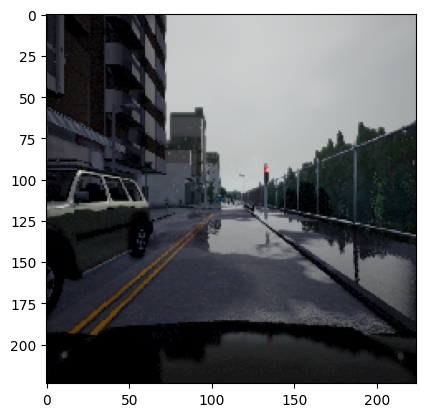

In [5]:
img = cv2.imread(TRAIN_IMAGES + "02_00_000.png", cv2.IMREAD_COLOR_RGB)
plt.imshow(img)


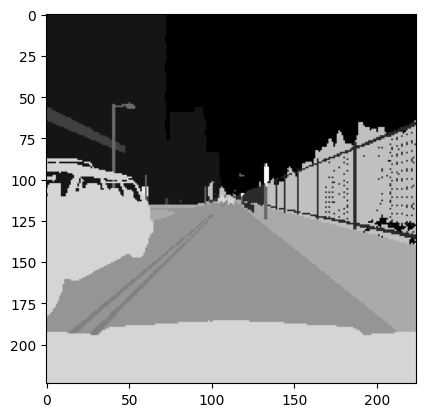

In [6]:
label = cv2.imread(TRAIN_LABELS + "02_00_000.png", cv2.IMREAD_COLOR_RGB)
label = label[:, :, 0]
plt.imshow(label, cmap='gray')


In [7]:
np.unique(label)


array([ 0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12], dtype=uint8)

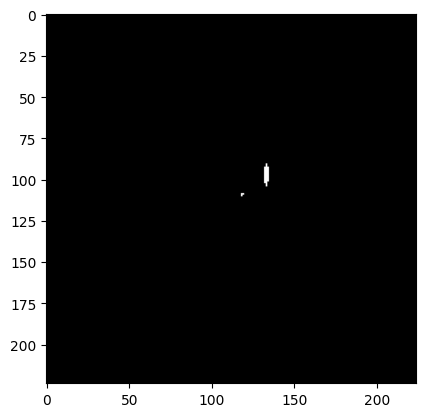

In [8]:
plt.imshow(label == 12, cmap='gray')


# Visualizing the dataset

In [9]:
batch_sizes = [32, 32, 32]
train_loader, val_loader, test_loader, train_dataset, val_dataset, test_dataset = get_dataloaders(batch_sizes=batch_sizes, return_datasets=True)


In [10]:
num_train_ims, num_val_ims, num_test_ims = len(train_dataset), len(val_dataset), len(test_dataset)
num_train_ims, num_val_ims, num_test_ims


(1600, 400, 500)

Picking a random index from train set to visualize

In [15]:
def visualize_mask(dataset: SegmentationDataset, idx = None):
    if idx is None:
        idx = random.randint(0, len(dataset))

    im_tensor, label_tensor, img_path = dataset[idx]

    image = tensor_to_uint8_numpy(im_tensor)
    label = tensor_to_uint8_numpy(label_tensor)
    
    fig, axs = plt.subplots(2, 7, figsize=(20, 10))
    
    axs[0, 0].imshow(image)
    axs[0, 0].set_title("Original Image")
    
    subplot_idx = 1
    for i in range(13):
        row, col = subplot_idx // 7, subplot_idx % 7
        mask = label == i
        axs[row, col].imshow(mask, cmap='gray')
        axs[row, col].set_title(f"{dataset.idx_to_class[i]}")
        subplot_idx += 1
        
    plt.tight_layout()
    plt.savefig(f"dataviz/mask_visualization_{idx}.png")
    plt.show()


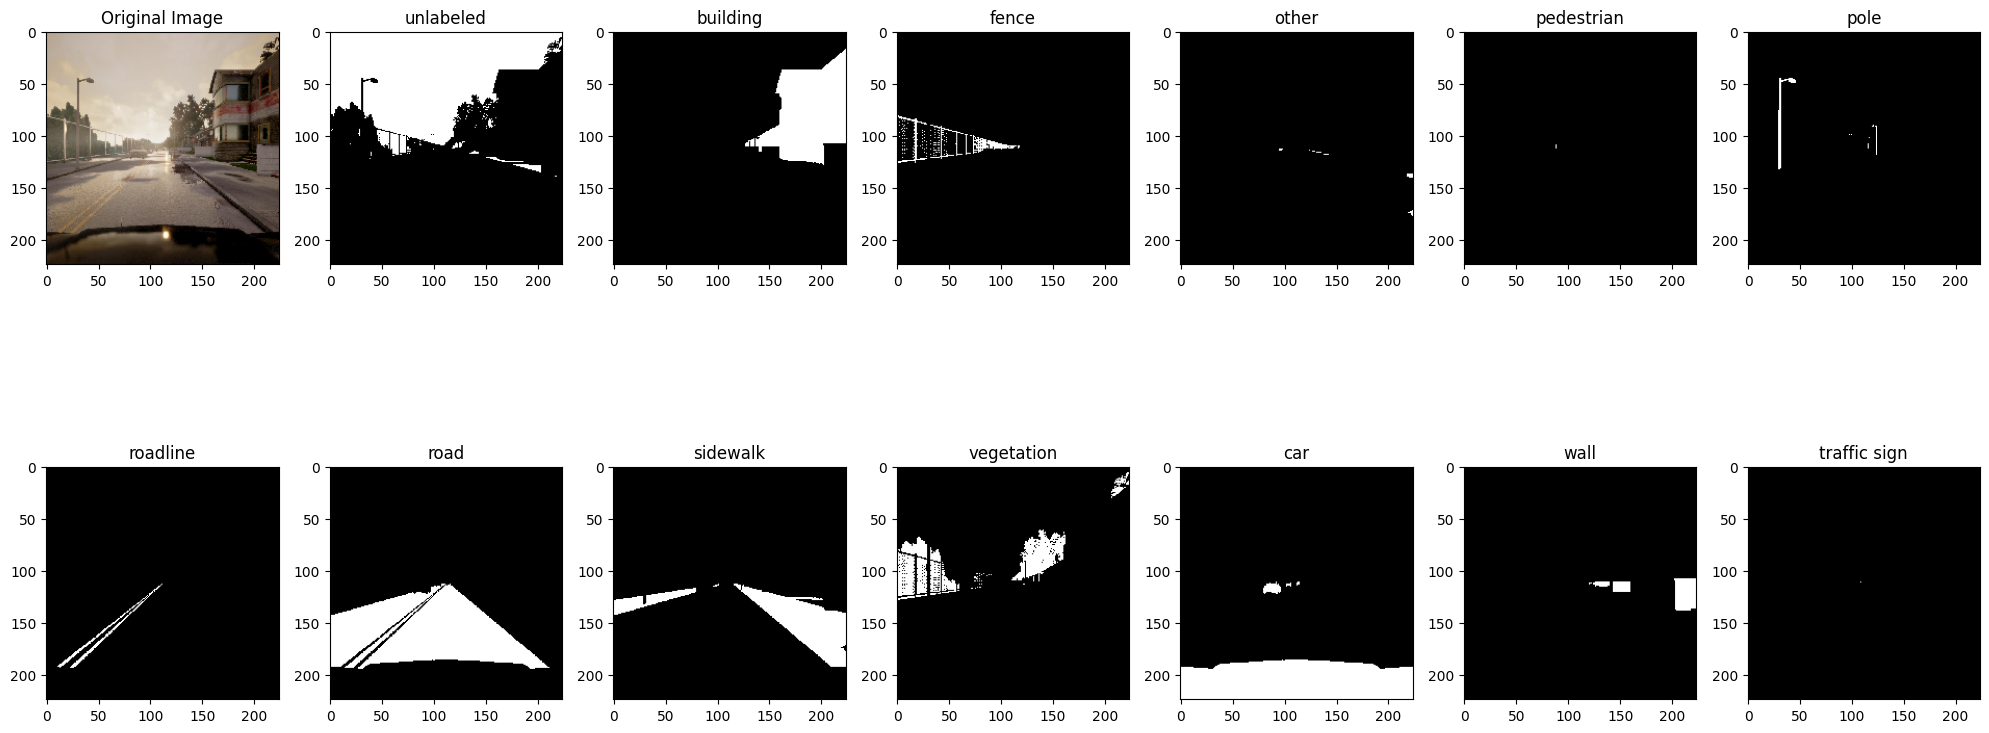

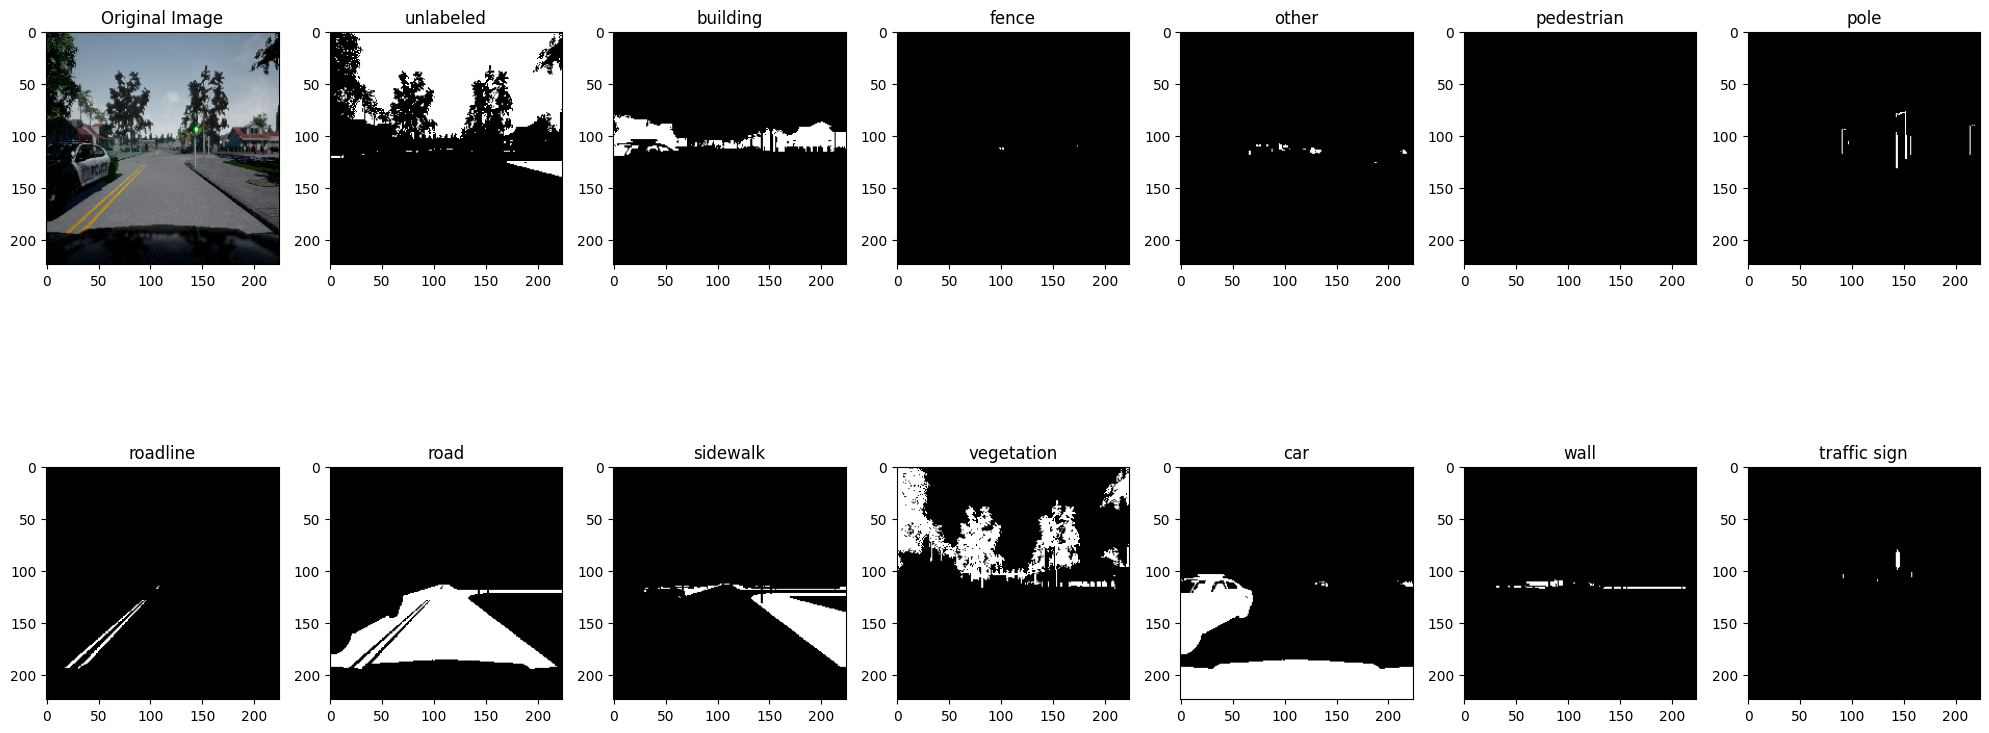

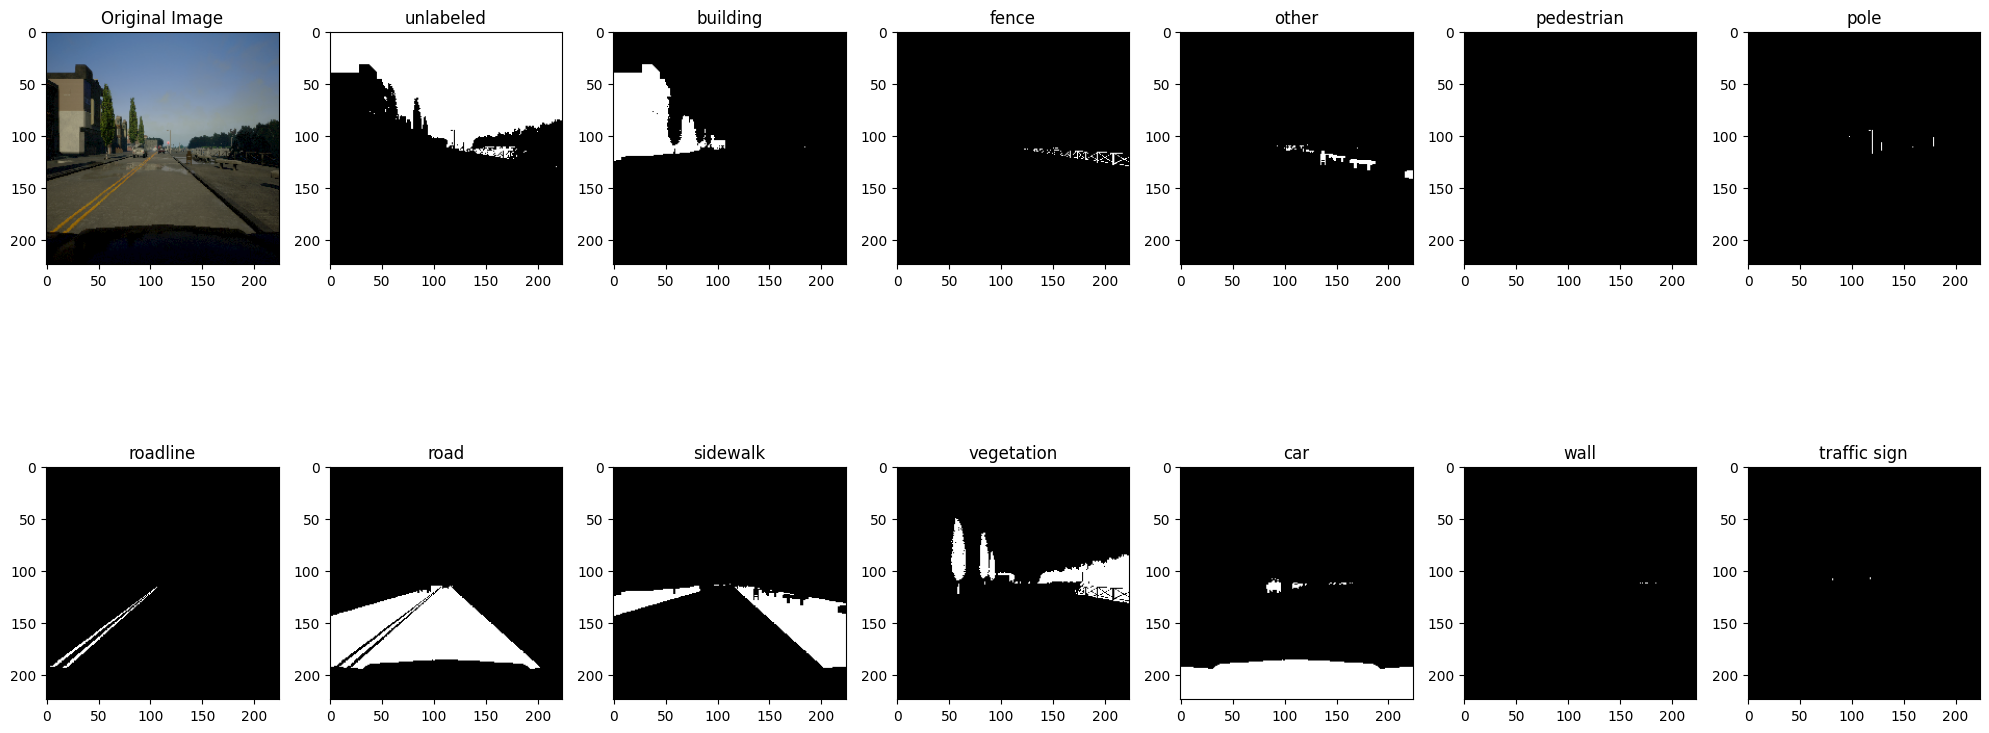

In [16]:
for i in range(3):
    visualize_mask(train_dataset)
